## Лабораторная №5. Задание 2

In [29]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

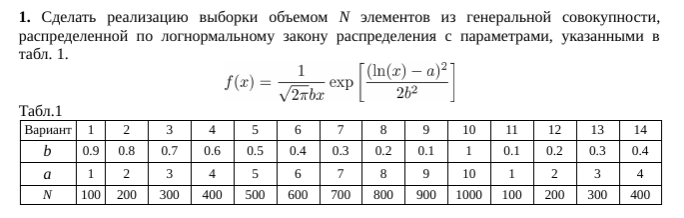

In [30]:
a = 10
b = 1
N = 1000

lognorm_values = stats.lognorm.rvs(s=b, scale=np.exp(a), size=N)

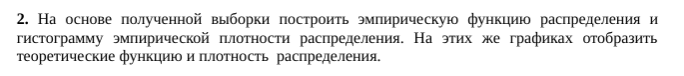

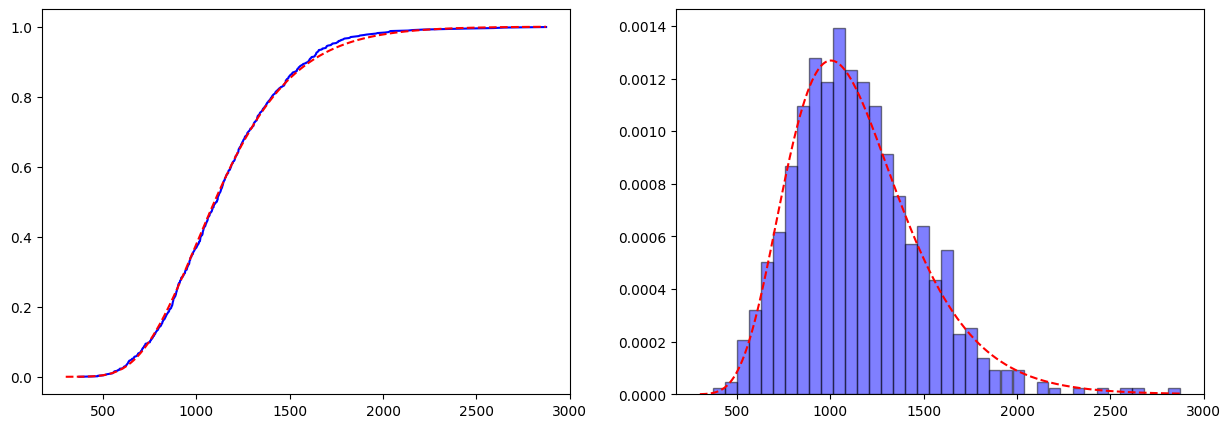

In [31]:
# Построение эмпирической функции распределения и гистограммы плотности
# Сравнение с теоретическими распределением

# Сортируем выборку для построения эмпирической функции распределения
sorted_values = np.sort(lognorm_values)  # Упорядоченная по возрастанию выборка
n_values = np.arange(1, N+1)            # Номера элементов от 1 до N
p_values = np.zeros(N)                  # Массив для значений эмпирической функции распределения

# Подготовка точек для построения теоретических кривых
# 3000 точек в диапазоне от 300 до максимального значения в выборке
x_values = np.linspace(300, np.max(sorted_values), 3000)

# Построение эмпирической функции распределения F̂ₙ(x)
for i in range(N):
    # nx - количество элементов выборки, меньших текущего значения sorted_values[i]
    nx = np.sum(lognorm_values < sorted_values[i])
    # Эмпирическая функция распределения: F̂ₙ(x) = (количество элементов < x) / N
    p_values[i] = nx / N

# Подготовка данных для гистограммы (эмпирическая плотность)
min_x = np.min(lognorm_values)  # Минимальное значение в выборке
max_x = np.max(lognorm_values)  # Максимальное значение в выборке

dx_count = 40  # Количество интервалов разбиения для гистограммы
dx = (max_x - min_x) / dx_count  # Ширина одного интервала

# Создание границ интервалов для гистограммы
dxs = np.linspace(min_x, max_x, dx_count)

# Построение гистограммы: n_i - количество элементов в каждом интервале
# edges - границы интервалов
n_i, edges = np.histogram(lognorm_values, bins=dxs)

# Вычисление центров интервалов для отображения столбцов гистограммы
centers = (edges[:-1] + edges[1:]) / 2

# Вычисление эмпирической плотности распределения
# p_i = (n_i / N) / dx - частота, деленная на ширину интервала
p_i = n_i / (N * dx)

# Построение графиков
plt.figure(figsize=(15,5))

# Левый график: функция распределения
plt.subplot(1, 2, 1)
# Синяя линия: эмпирическая функция распределения
plt.plot(sorted_values, p_values, 'b', label='Эмпирическая F(x)')
# Красная пунктирная линия: теоретическая функция распределения логнормального закона
plt.plot(x_values, stats.lognorm.cdf(x_values, s=b, scale=np.exp(a)), 'r--', label='Теоретическая F(x)')
plt.title("Функция распределения")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()

# Правый график: плотность распределения
plt.subplot(1, 2, 2)
# Синие столбцы: гистограмма эмпирической плотности
plt.bar(centers, p_i, width=dx, alpha=0.5, color='b', edgecolor='black', label='Эмпирическая плотность')
# Красная пунктирная линия: теоретическая плотность логнормального распределения
plt.plot(x_values, stats.lognorm.pdf(x_values, s=b, scale=np.exp(a)), 'r--', label='Теоретическая плотность')
plt.title("Плотность распределения")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

plt.tight_layout()  # Автоматическая регулировка отступов
plt.show()

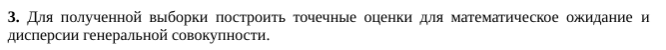

In [32]:
# Вычисление выборочного среднего - точечной оценки математического ожидания
# Выборочное среднее является несмещенной и состоятельной оценкой
mean = np.mean(lognorm_values)

# Вычисление выборочной дисперсии с поправкой Бесселя (ddof=1)
# Это несмещенная оценка дисперсии генеральной совокупности
# ddof=1 означает использование N-1 в знаменателе вместо N
var = np.var(lognorm_values, ddof=1)

print(f"Точечная оценка мат. ожидания: {mean}")
print(f"Точечная оценка дисперсии: {var}")

Точечная оценка мат. ожидания: 1141.3163673758158
Точечная оценка дисперсии: 115900.0206296283


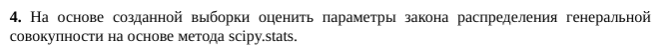

In [33]:
# stats.lognorm.fit подбирает параметры логнормального распределения,
# которые наилучшим образом соответствуют данным
# floc=0 фиксирует параметр loc (сдвиг) равным 0, предполагая стандартную форму логнормального распределения
s, loc, scale = stats.lognorm.fit(lognorm_values, floc=0)

# Преобразование параметров к форме, используемой в нашем анализе:
# В scipy параметры логнормального распределения:
# s - параметр формы (σ нормального распределения логарифма)
# loc - параметр сдвига (фиксирован как 0)
# scale - масштабный параметр (exp(μ) нормального распределения логарифма)

scipy_a = np.log(scale)  # μ - среднее нормального распределения логарифма
scipy_b = s              # σ - стандартное отклонение нормального распределения логарифма

print(f"scipy.stats")
print(f"a = {scipy_a}")
print(f"b = {scipy_b}")

scipy.stats
a = 6.99668924750242
b = 0.29568692230179333


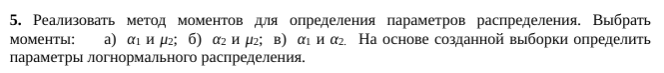

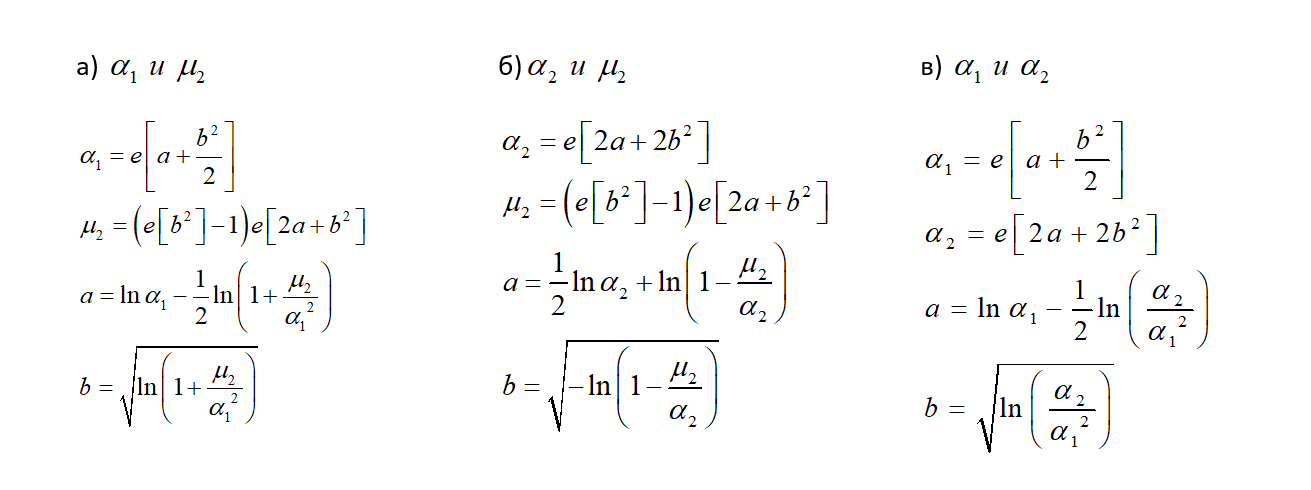

In [34]:
# Метод моментов: приравниваем выборочные моменты к теоретическим моментам распределения

# Вычисление необходимых выборочных моментов:
# alpha1 - первый начальный момент (выборочное среднее)
alpha1 = np.mean(lognorm_values)

# alpha2 - второй начальный момент (среднее квадратов)
alpha2 = np.mean(lognorm_values**2)

# mu2 - второй центральный момент (выборочная дисперсия)
# Важно: здесь используется смещенная оценка дисперсии (без ddof=1)
# так как в методе моментов используются теоретические формулы для генеральной совокупности
mu2 = np.var(lognorm_values)  # по умолчанию ddof=0

# ------------------------------------------------------------------
# а) Использование первых двух моментов: alpha1 (среднее) и mu2 (дисперсия)
# Теоретические формулы для логнормального распределения:
# alpha1 = exp(a + b^2/2)
# mu2 = (exp(b^2) - 1) * exp(2a + b^2)
# Решая систему уравнений, получаем:

# a = ln(alpha1) - 0.5 * ln(1 + mu2/alpha1^2)
# b = sqrt(ln(1 + mu2/alpha1^2))
a_a = np.log(alpha1) - 0.5 * np.log(1 + mu2/(alpha1**2))
b_a = np.sqrt(np.log(1 + mu2/(alpha1**2)))

print(f"Метод моментов а) alpha1 и mu2")
print(f"a = {a_a}")
print(f"b = {b_a}")

# ------------------------------------------------------------------
# б) Использование моментов: alpha2 (среднее квадратов) и mu2 (дисперсия)
# Теоретические формулы:
# alpha2 = exp(2a + 2b^2)
# mu2 = (exp(b^2) - 1) * exp(2a + b^2)
# Решая систему, получаем:

# a = 0.5 * ln(alpha2) + ln(1 - mu2/alpha2)
# b = sqrt(-ln(1 - mu2/alpha2))
# Важно: выражение под корнем должно быть положительным: 1 - mu2/alpha2 > 0
a_b = 0.5 * np.log(alpha2) + np.log(1 - mu2/alpha2)
b_b = np.sqrt(-np.log(1 - mu2/alpha2))

print(f"Метод моментов б) alpha2 и mu2")
print(f"a = {a_b}")
print(f"b = {b_b}")

# ------------------------------------------------------------------
# в) Использование первых двух начальных моментов: alpha1 и alpha2
# Теоретические формулы:
# alpha1 = exp(a + b^2/2)
# alpha2 = exp(2a + 2b^2)
# Решая систему, получаем:

# a = ln(alpha1) - 0.5 * ln(alpha2/alpha1^2)
# b = sqrt(ln(alpha2/alpha1^2))
# Заметим, что alpha2/alpha1^2 = 1 + коэффициент вариации^2
a_c = np.log(alpha1) - 0.5 * np.log(alpha2/(alpha1**2))
b_c = np.sqrt(np.log(alpha2/(alpha1**2)))

print(f"Метод моментов в) alpha1 и alpha2")
print(f"a = {a_c}")
print(f"b = {b_c}")

Метод моментов а) alpha1 и mu2
a = 6.997377182518525
b = 0.2917546946722232
Метод моментов б) alpha2 и mu2
a = 6.997377182518524
b = 0.2917546946722232
Метод моментов в) alpha1 и alpha2
a = 6.997377182518525
b = 0.2917546946722232


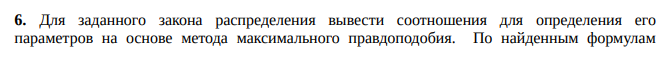\
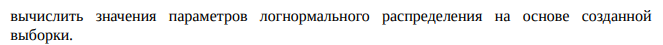\
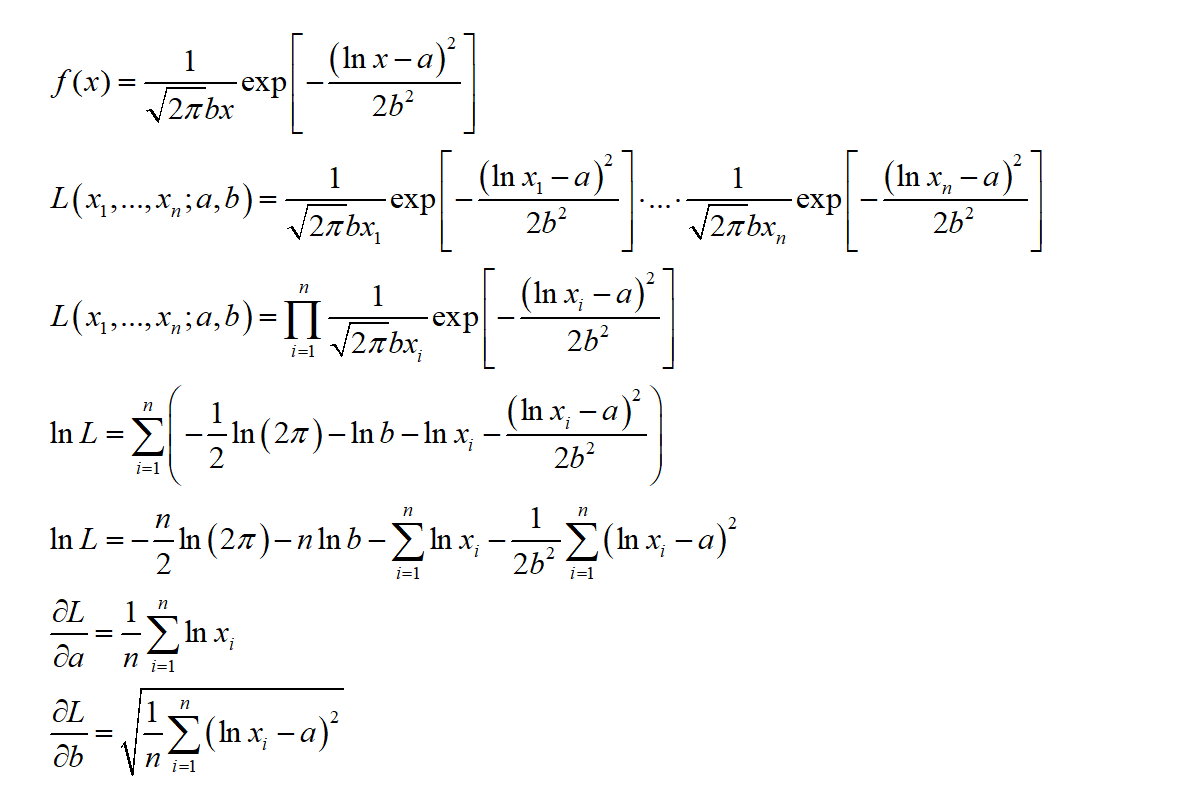

In [35]:
# Метод максимального правдоподобия: находим параметры, которые максимизируют вероятность наблюдения данной выборки

# Для логнормального распределения: если X ~ LogNormal(a, b^2), то ln(X) ~ N(a, b^2)
# Это позволяет получить аналитические формулы для оценок MLE

# Оценка параметра a (среднее нормального распределения логарифмов):
# mle_a = (1/n) * Σ ln(x_i) - выборочное среднее логарифмов
# Это следует из условия ∂lnL/∂a = 0
mle_a = 1/N * np.sum(np.log(lognorm_values))

# Оценка параметра b (стандартное отклонение нормального распределения логарифмов):
# mle_b = sqrt((1/n) * Σ (ln(x_i) - a)^2) - выборочное стандартное отклонение логарифмов
# Это следует из условия ∂lnL/∂b = 0
# Важно: используем N в знаменателе, не N-1 (MLE дает смещенную, но состоятельную оценку)
mle_b = np.sqrt(1/N * np.sum((np.log(lognorm_values) - mle_a)**2))

print(f"Метод максимального правдоподобия")
print(f"a = {mle_a}")
print(f"b = {mle_b}")

Метод максимального правдоподобия
a = 6.99668924750242
b = 0.29568692230179333


In [36]:
# Сравнение всех методов оценки параметров

# Создаем списки оценок параметров a, полученных разными методами:
# 1. Исходные параметры (из таблицы 1)
# 2. Метод scipy.stats.fit (MLE с использованием готовой функции)
# 3. Метод моментов (a) - через alpha1 и mu2
# 4. Метод моментов (б) - через alpha2 и mu2
# 5. Метод моментов (в) - через alpha1 и alpha2
# 6. Наш расчет MLE по аналитическим формулам
list_a = [a, scipy_a, a_a, a_b, a_c, mle_a]

# Создаем списки оценок параметров b, полученных разными методами
list_b = [b, scipy_b, b_a, b_b, b_c, mle_b]

# Названия методов для отображения в таблице
indexes = ['Заданные (из табл. 1)', 
           'Метод scipy.stats', 
           'Метод моментов для alpha1 и mu2', 
           'Метод моментов для alpha2 и mu2', 
           'Метод моментов для alpha1 и alpha2', 
           'Метод макс. правдоподобия']

# Создаем DataFrame для удобного сравнения всех методов
parameters_df = pd.DataFrame(index=indexes, columns=['a', 'b'])

# Заполняем DataFrame значениями параметров
parameters_df['a'] = list_a
parameters_df['b'] = list_b

# Отображаем таблицу сравнения
display(parameters_df)

,a,b
Заданные (из табл. 1),7.000000,0.300000
Метод scipy.stats,6.996689,0.295687
Метод моментов для alpha1 и mu2,6.997377,0.291755
Метод моментов для alpha2 и mu2,6.997377,0.291755
Метод моментов для alpha1 и alpha2,6.997377,0.291755
Метод макс. правдоподобия,6.996689,0.295687


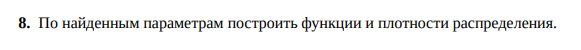

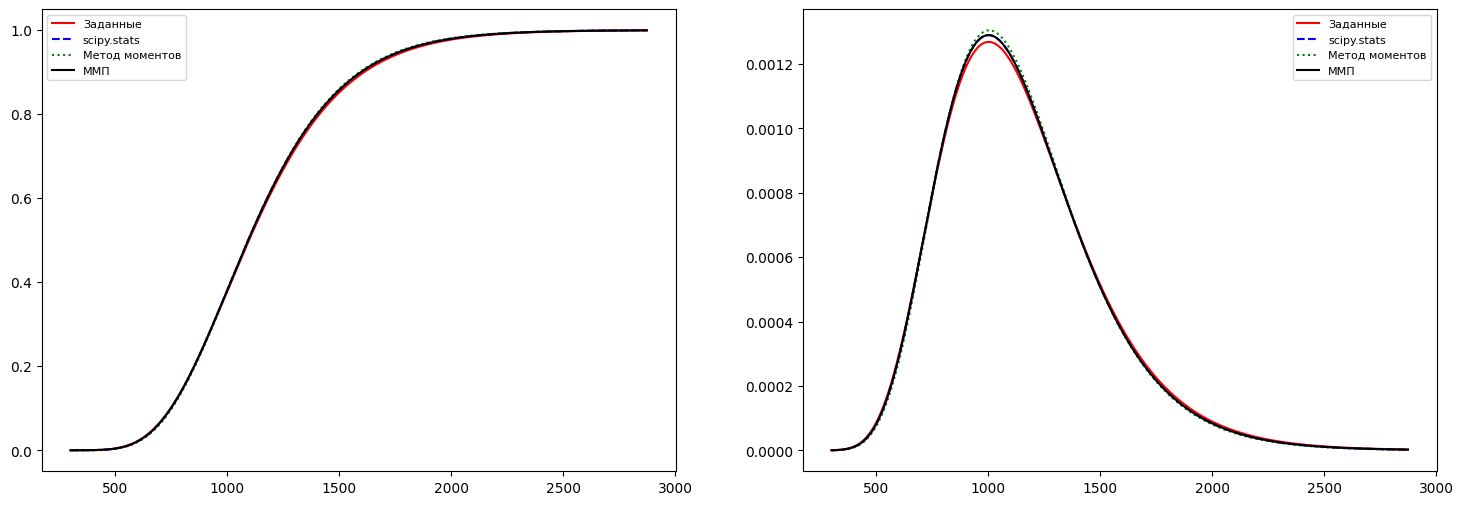

In [37]:
# Визуальное сравнение оценок параметров по функции распределения и плотности

plt.figure(figsize=(18, 6))

# Левый график: Функции распределения
plt.subplot(1, 2, 1)

# Красная линия: исходное (заданное) распределение - эталон
# Использует параметры a и b, которые были заданы изначально
plt.plot(x_values, stats.lognorm.cdf(x_values, s=b, scale=np.exp(a)), 'r', label='Заданные')

# Синяя пунктирная линия: оценка методом scipy.stats.fit (MLE)
# Параметры scipy_a и scipy_b получены через функцию fit
plt.plot(x_values, stats.lognorm.cdf(x_values, s=scipy_b, scale=np.exp(scipy_a)), 'b--', label='scipy.stats')

# Зеленая точечная линия: оценка методом моментов (вариант в - через alpha1 и alpha2)
# Выбран вариант в, так как он обычно наиболее устойчив из методов моментов
plt.plot(x_values, stats.lognorm.cdf(x_values, s=b_c, scale=np.exp(a_c)), 'g:', label='Метод моментов')

# Черная линия: оценка методом максимального правдоподобия (MLE) по нашим формулам
# Параметры mle_a и mle_b вычислены аналитически
plt.plot(x_values, stats.lognorm.cdf(x_values, s=mle_b, scale=np.exp(mle_a)), 'black', label='ММП')

plt.legend(fontsize=8)
plt.title("Функция распределения")
plt.xlabel("x")
plt.ylabel("F(x)")

# Правый график: Плотности распределения
plt.subplot(1, 2, 2)

# Красная линия: исходная (заданная) плотность распределения
plt.plot(x_values, stats.lognorm.pdf(x_values, s=b, scale=np.exp(a)), 'r', label='Заданные')

# Синяя пунктирная линия: плотность по оценке scipy.stats
plt.plot(x_values, stats.lognorm.pdf(x_values, s=scipy_b, scale=np.exp(scipy_a)), 'b--', label='scipy.stats')

# Зеленая точечная линия: плотность по оценке методом моментов
plt.plot(x_values, stats.lognorm.pdf(x_values, s=b_c, scale=np.exp(a_c)), 'g:', label='Метод моментов')

# Черная линия: плотность по оценке методом максимального правдоподобия
plt.plot(x_values, stats.lognorm.pdf(x_values, s=mle_b, scale=np.exp(mle_a)), 'black', label='ММП')

plt.legend(fontsize=8)
plt.title("Плотность распределения")
plt.xlabel("x")
plt.ylabel("f(x)")

plt.tight_layout()  # Автоматическая регулировка отступов между графиками
plt.show()